In [56]:
%load_ext autoreload
%autoreload 2
from fluff.TrigFN import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import uniform
import scipy.stats as stats
import pandas as pd
from sklearn.neighbors import NearestNeighbors

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
plt.rcParams['text.usetex'] = True

In [22]:
date = '01062024'

# Rozmiar testu

In [4]:
dist_1 = {
    'name': 'norm',
    'params': {'loc': 5, 'scale': 1}
}

dist_2 = {
    'name': 'norm',
    'params': {'loc': 5, 'scale': 1}
}

sample_pairs = [(10,10), (10, 15), (15, 15), (20, 20), (20, 15), (25, 20), (25,25)] 
empirical_size(sample_pairs, dist_1, dist_2, TFN_statistic, num_tests=1000)

,sample_size1,sample_size2,empirical_size
0,10,10,0.0
1,10,15,0.1
2,15,15,0.0
3,20,15,0.0
4,20,20,0.0
5,25,20,0.0
6,25,25,0.1


# Moc vs $\mu_2-\mu_1$

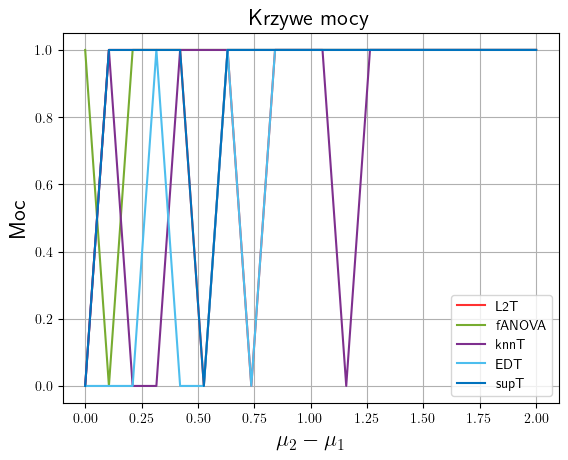

In [19]:
dist = {
    'name': 'norm',
    'params': {'loc':5, 'scale': 1}
}

differences = np.linspace(0, 2, 20)  
selected_tests = ['L2T', 'fANOVA', 'knnT', 'EDT', 'supT'] 
dfs_power = calculate_multiple_powers(dist, delta_1=0.55, delta_2 = 0.65, differences=differences, sample_size=25, num_tests=1000, num_permutations=1000, 
return_power=True, selected_tests = selected_tests)

In [ ]:
for test in selected_tests:    
    dfs_power[test].to_csv('power_data_'+test+date+'.csv', index=False) 

# Moc vs $\epsilon$

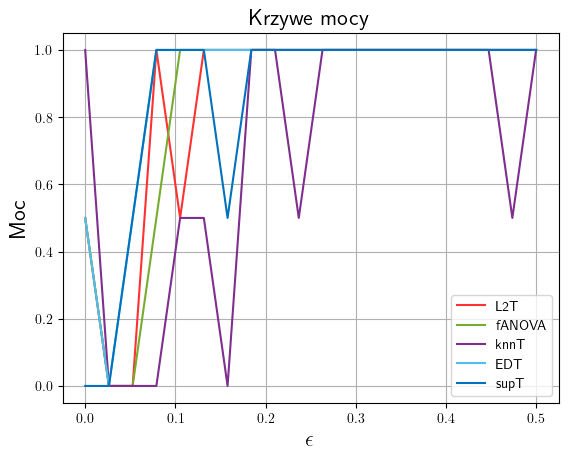

In [20]:
dist = {
    'name': 'norm',
    'params': {'loc':5, 'scale': 1}
}
delta_1 = 0.55
delta_2 = 0.65
mixture_proportions = np.linspace(0, 0.5, 20)
shift = 10

selected_tests = ['L2T', 'fANOVA', 'knnT', 'EDT', 'supT'] 
dfs_power_eps = calculate_multiple_powers_eps(dist, delta_1, delta_2, mixture_proportions, shift, sample_size=25, num_tests=1000, num_permutations=1000, 
return_power=True, selected_tests = selected_tests)

In [ ]:
for test in selected_tests:    
    dfs_power_eps[test].to_csv('power_data_eps_'+test+date+'.csv', index=False) 

# Moc vs $\sigma$

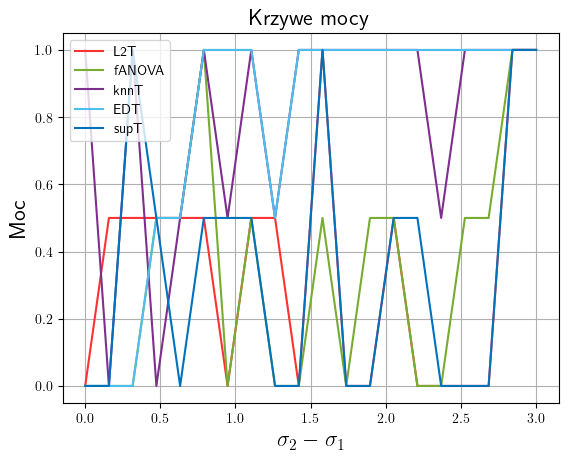

In [21]:
dist = {
    'name': 'norm',
    'params': {'loc': 5, 'scale': 1}
}

delta_1 = 0.55
delta_2 = 0.65
sigma_differences = np.linspace(0, 3, 20)  
selected_tests = ['L2T', 'fANOVA', 'knnT', 'EDT', 'supT'] 

dfs_power_sigma = calculate_multiple_powers_sigma(dist, delta_1, delta_2,differences=sigma_differences,
                sample_size=25, num_tests=1000, num_permutations=1000, return_power=False, selected_tests=selected_tests)

In [ ]:
for test in selected_tests:    
    dfs_power_sigma[test].to_csv('power_data_sigma_'+test+date+'.csv', index=False) 

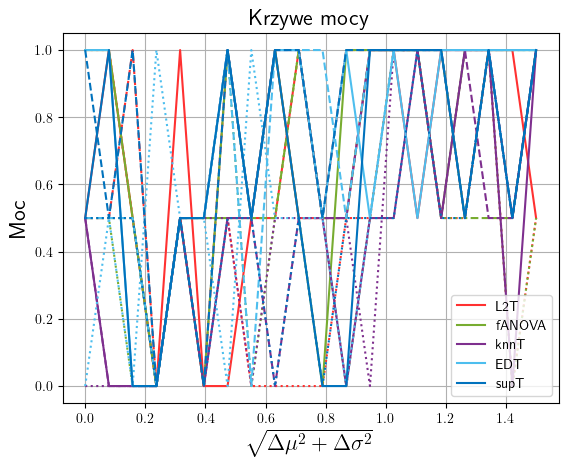

In [57]:
dist = {
    'name': 'norm',
    'params': {'loc': 5, 'scale': 1}
}

delta_1 = 0.55
delta_2 = 0.65
d_frechet = 1.5
linspace_n = 20
selected_tests = ['L2T', 'fANOVA', 'knnT', 'EDT', 'supT'] 

dfs_power_frechet = calculate_multiple_powers_frechet(dist, delta_1, delta_2,d_frechet, linspace_n,
                sample_size=25, num_tests=1000, num_permutations=1000, return_power=True, selected_tests=selected_tests)

In [ ]:
for test in selected_tests:    
    dfs_power_frechet[test].to_csv('power_data_frechet_'+test+date+'.csv', index=False) 